# Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="DEjLPJ8ox06Svxy1X1ig")
project = rf.workspace("yolo-lkgro").project("human-detection-qrsic")
version = project.version(3)
dataset = version.download("yolov8")

  Using cached roboflow-1.1.53-py3-none-any.whl.metadata (9.7 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached roboflow-1.1.53-py3-none-any.whl (82 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.48.2 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.20.3 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-detection-3 in yolov8:: 100%|██████████| 203/203 [00:00<00:00, 8191.76it/s]


In [1]:
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Walk1/Walk1.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Walk2/Walk2.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Walk3/Walk3.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Browse1/Browse1.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Browse2/Browse2.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Browse3/Browse3.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Browse4/Browse4.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Browse_WhileWaiting1/Browse_WhileWaiting1.mpg
!wget https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Browse_WhileWaiting2/Browse_WhileWaiting2.mpg

--2025-03-01 18:30:51--  https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Walk1/Walk1.mpg
Resolving homepages.inf.ed.ac.uk (homepages.inf.ed.ac.uk)... 129.215.32.113
Connecting to homepages.inf.ed.ac.uk (homepages.inf.ed.ac.uk)|129.215.32.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7208095 (6.9M) [video/mpeg]
Saving to: ‘Walk1.mpg’

Walk1.mpg           100%[===================>]   6.87M  7.22MB/s    in 1.0s    

2025-03-01 18:30:52 (7.22 MB/s) - ‘Walk1.mpg’ saved [7208095/7208095]

--2025-03-01 18:30:53--  https://homepages.inf.ed.ac.uk/rbf/CAVIARDATA1/Walk2/Walk2.mpg
Resolving homepages.inf.ed.ac.uk (homepages.inf.ed.ac.uk)... 129.215.32.113
Connecting to homepages.inf.ed.ac.uk (homepages.inf.ed.ac.uk)|129.215.32.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12312343 (12M) [video/mpeg]
Saving to: ‘Walk2.mpg’

Walk2.mpg           100%[===================>]  11.74M  8.08MB/s    in 1.5s    

2025-03-01 18:30:55 (8.08 MB/s) -

# Trying ready yolov8n-640 on image

In [16]:
from inference import get_model
import supervision as sv
from inference.core.utils.image_utils import load_image_bgr

image = load_image_bgr("./Human-detection-3/train/images/rider-100_jpg.rf.6d69a23dc0aa52191e405edd4b2deac0.jpg")
type(image)

numpy.ndarray

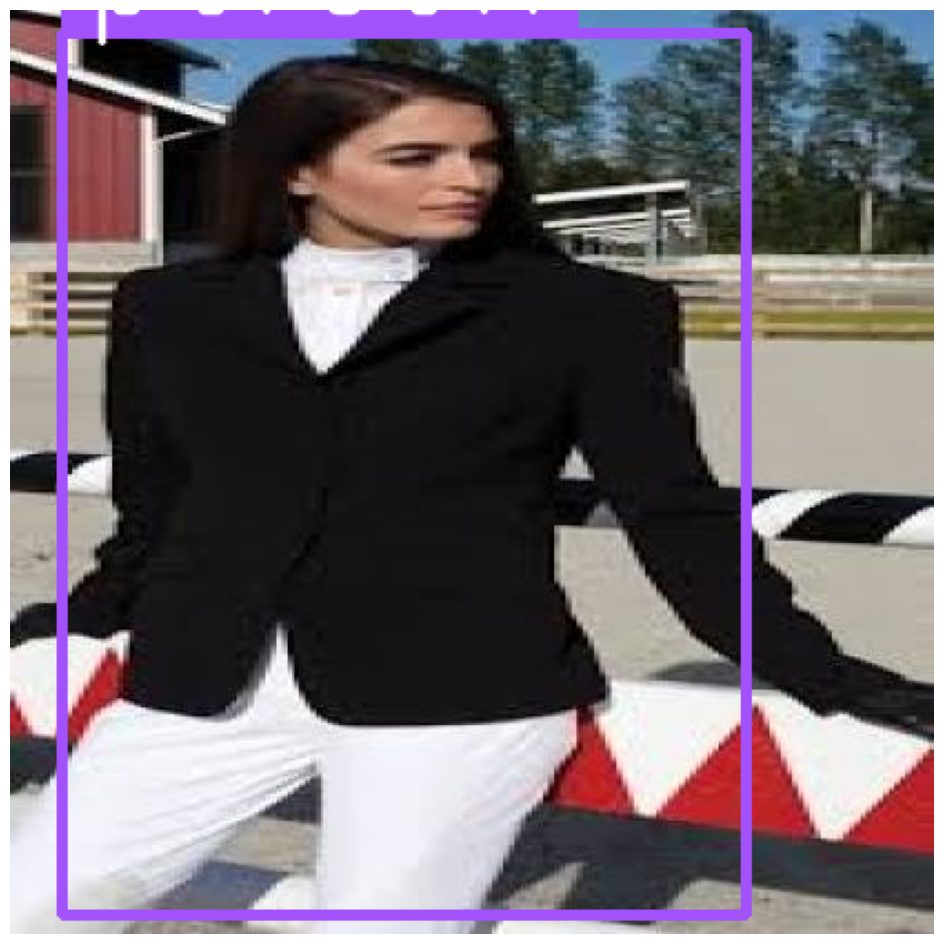

In [17]:
model = get_model(model_id="yolov8n-640")
results = model.infer(image)[0]
results = sv.Detections.from_inference(results)
annotator = sv.BoxAnnotator(thickness=4)
annotated_image = annotator.annotate(image, results)
annotator = sv.LabelAnnotator(text_scale=2, text_thickness=2)
annotated_image = annotator.annotate(annotated_image, results)
sv.plot_image(annotated_image)

# Extracting video dataset

In [18]:
import ffmpeg
import os

def extract_frames(input_video, output_folder, frame_rate=1, image_format='jpg'):
    """
    Extracts frames from a video using ffmpeg-python.

    Args:
        input_video (str): Path to the input video file.
        output_folder (str): Path to the output folder where frames will be saved.
        frame_rate (float):  Frames per second to extract (e.g., 1 for one frame per second, 0.5 for one frame every two seconds).
                            Defaults to 1.
        image_format (str): The image format to save the frames (e.g., 'jpg', 'png'). Defaults to 'jpg'.
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    try:
        ffmpeg_video = ffmpeg.input(input_video)
        ffmpeg_video = ffmpeg_video.filter('fps', fps=frame_rate)  # Set the frame rate
        ffmpeg_video = ffmpeg_video.output(os.path.join(output_folder, 'frame_%04d.' + image_format))  # Output pattern
        ffmpeg_video = ffmpeg_video.run(capture_stdout=True, capture_stderr=True) # Capture output and errors

        print(f"Successfully extracted frames from '{ffmpeg_video}' to '{output_folder}'")

    except ffmpeg.Error as e:
        print(f"An error occurred: {e.stderr.decode('utf8')}")  # Decode the error message


# Example usage:
input_video_path = 'Browse1.mpg'  # Replace with your video file path
output_folder_path = 'extracted_frames'
frames_per_second = 0.5 # Extract 1 frame every 2 seconds
image_format = 'jpg'

extract_frames(input_video_path, output_folder_path, frames_per_second, image_format)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

# Analyse video dataset

In [10]:
from PIL import Image
import numpy as np
import os

def load_images_from_folder_pillow(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, filename)).convert('RGB') # Explicitly convert to RGB
            img_array = np.array(img)
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
            continue  # Skip to the next image

    return np.array(images)

# Example usage:
folder_path = "./extracted_frames" # Replace with the actual path
image_arrays = load_images_from_folder_pillow(folder_path)

In [11]:
image = image_arrays[11]

IndexError: index 11 is out of bounds for axis 0 with size 0

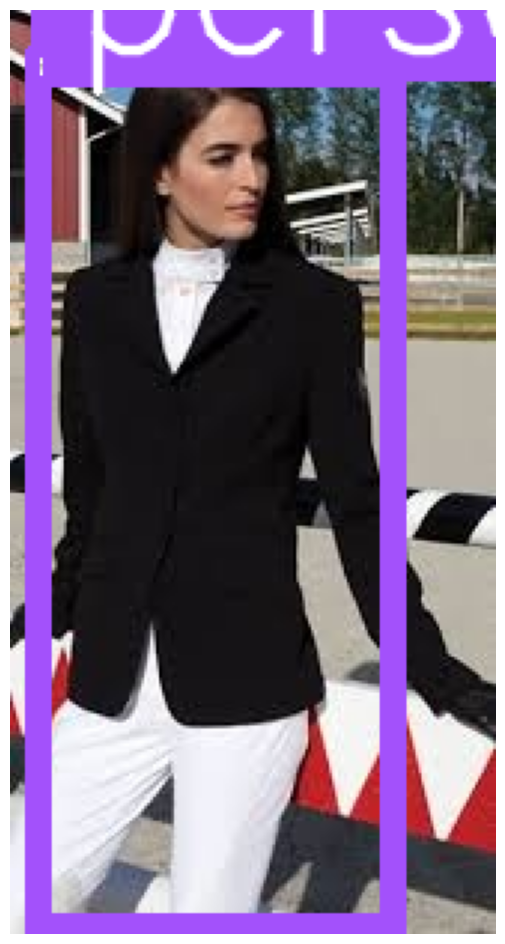

In [12]:
model = get_model(model_id="yolov8n-640")
results = model.infer(image)[0]
results = sv.Detections.from_inference(results)
annotator = sv.BoxAnnotator(thickness=4)
annotated_image = annotator.annotate(image, results)
annotator = sv.LabelAnnotator(text_scale=2, text_thickness=2)
annotated_image = annotator.annotate(annotated_image, results)
sv.plot_image(annotated_image)

In [13]:
image = image_arrays[14]

IndexError: index 14 is out of bounds for axis 0 with size 0

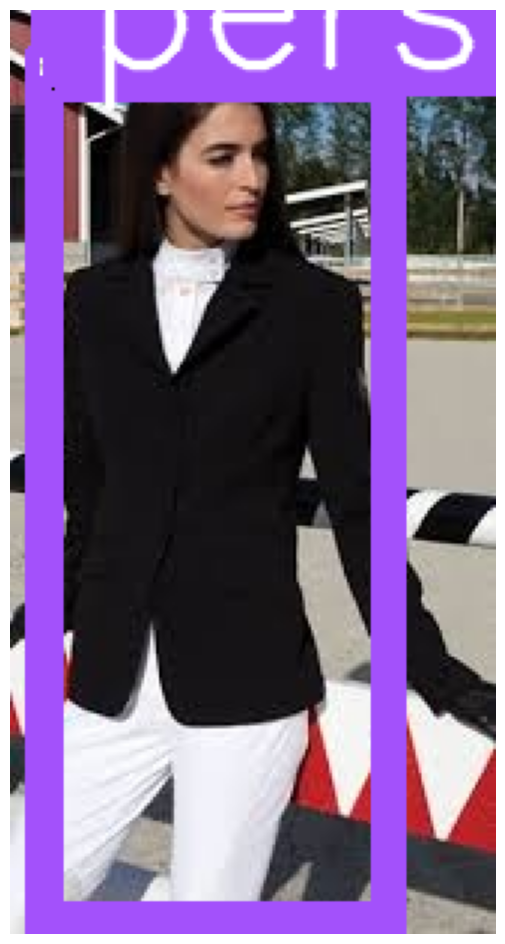

In [14]:
model = get_model(model_id="yolov8n-640")
results = model.infer(image)[0]
results = sv.Detections.from_inference(results)
annotator = sv.BoxAnnotator(thickness=4)
annotated_image = annotator.annotate(image, results)
annotator = sv.LabelAnnotator(text_scale=2, text_thickness=2)
annotated_image = annotator.annotate(annotated_image, results)
sv.plot_image(annotated_image)

# Analysing photo from laptop camera

In [ ]:
from PIL import Image
import numpy as np
import os

def load_images_from_folder_pillow(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, filename)).convert('RGB') # Explicitly convert to RGB
            img_array = np.array(img)
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
            continue  # Skip to the next image

    return np.array(images)

# Example usage:
folder_path = "./laptop_cam_photos" # Replace with the actual path
image_arrays = load_images_from_folder_pillow(folder_path)

In [ ]:
image = image_arrays[8]

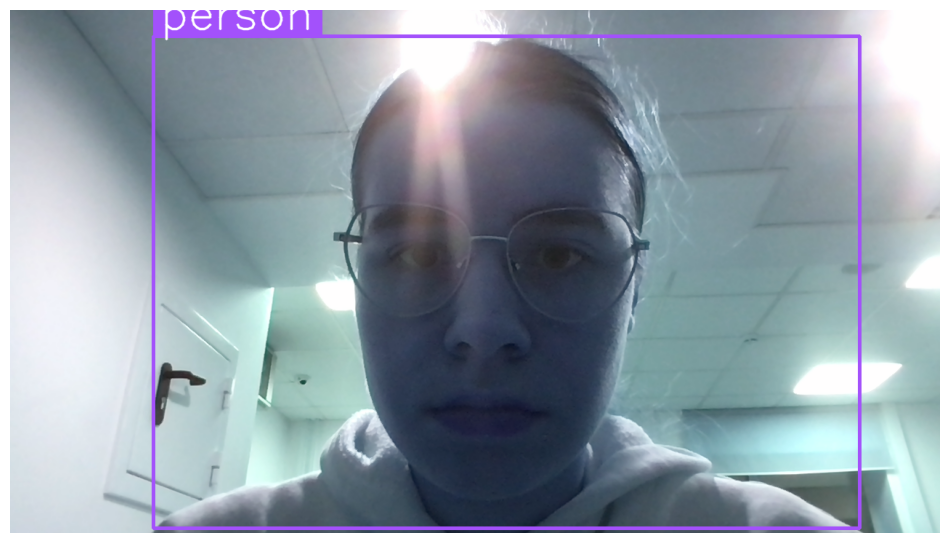

In [ ]:
model = get_model(model_id="yolov8n-640")
results = model.infer(image)[0]
results = sv.Detections.from_inference(results)
annotator = sv.BoxAnnotator(thickness=4)
annotated_image = annotator.annotate(image, results)
annotator = sv.LabelAnnotator(text_scale=2, text_thickness=2)
annotated_image = annotator.annotate(annotated_image, results)
sv.plot_image(annotated_image)